In [1]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [3]:
def get_label(index, hand, results):
    output = None
    for idx, classification in enumerate(results.multi_handedness):
        if classification.classification[0].index == index:
            
            # Process results
            label = classification.classification[0].label
            score = classification.classification[0].score
            text = '{} {}'.format(label, round(score, 2))
            
            # Extract Coordinates
            coords = tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.WRIST].x, hand.landmark[mp_hands.HandLandmark.WRIST].y)),
            [640,480]).astype(int))
            
            output = text, coords
            
    return output

In [4]:
def draw_finger_angles(image, results, joint_list):
    list_angles=[]
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
            list_angles.append(round(angle,2))   
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    return list_angles

In [5]:
joint_list = [[4,3,2],[3,2,1],[2,1,0],[1,0,5],[0,5,6],[5,6,7],[6,7,8],[0,9,10],[9,10,11],[10,11,12],[0,13,14],[13,14,15],[14,15,16],[0,17,18],[17,18,19],[18,19,20]]

In [6]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
                
                # Render left or right detection
                if get_label(num, hand, results):
                    text, coord = get_label(num, hand, results)
                    cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list)
            
        # Save our image    
        cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>


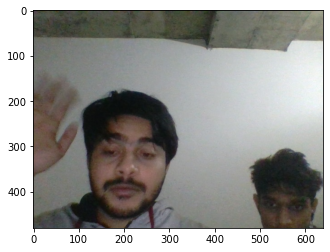

<class 'mediapipe.python.solution_base.SolutionOutputs'>


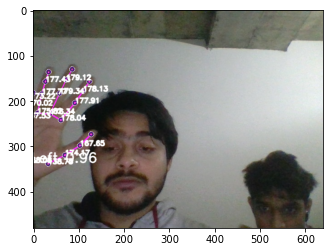

167.65
174.17
138.75
68.08
178.04
177.91
178.13
176.34
179.34
179.12
175.82
177.77
177.43
167.53
170.02
173.22
<class 'mediapipe.python.solution_base.SolutionOutputs'>


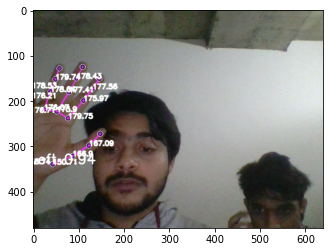

167.09
166.9
150.71
58.74
179.75
175.97
177.56
175.9
177.41
178.43
176.07
178.64
179.74
176.71
176.21
178.53
<class 'mediapipe.python.solution_base.SolutionOutputs'>


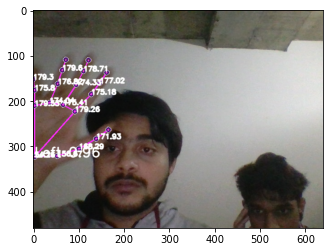

171.93
168.29
156.67
54.26
179.26
175.18
177.02
175.41
174.33
178.71
174.04
176.82
179.6
179.53
175.8
179.3
<class 'mediapipe.python.solution_base.SolutionOutputs'>


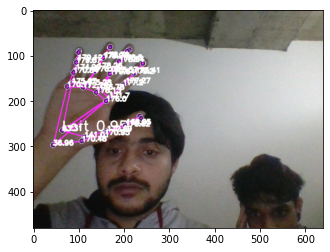

168.05
172.69
141.01
63.31
171.7
177.27
175.41
176.78
178.57
178.8
175.28
178.26
178.79
175.67
174.99
179.12
176.62
170.95
170.48
36.96
176.0
177.2
179.2
178.13
179.64
178.54
172.74
176.02
178.94
170.77
170.84
179.87
<class 'mediapipe.python.solution_base.SolutionOutputs'>


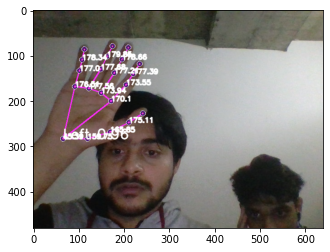

175.11
165.85
159.75
45.39
170.1
173.55
177.39
173.94
177.21
178.66
177.56
177.68
179.85
176.51
177.0
178.34
<class 'mediapipe.python.solution_base.SolutionOutputs'>


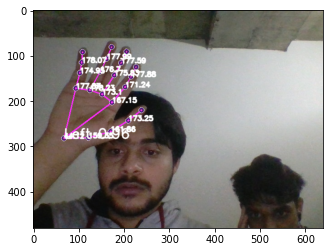

173.25
161.86
159.35
44.12
167.15
171.24
177.88
173.1
175.83
177.59
178.23
176.7
177.99
177.87
174.95
178.07
<class 'mediapipe.python.solution_base.SolutionOutputs'>


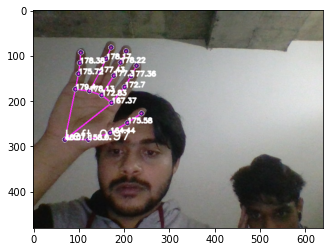

175.58
164.44
158.0
46.07
167.37
172.7
177.36
172.83
177.3
178.22
178.13
177.43
178.17
179.4
175.72
178.38
<class 'mediapipe.python.solution_base.SolutionOutputs'>


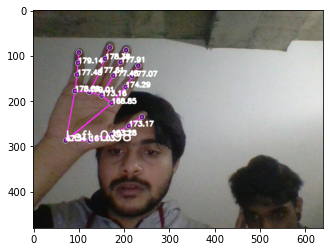

173.17
163.28
161.03
47.54
168.85
174.29
177.07
173.16
177.43
177.91
179.01
177.61
178.38
178.59
177.48
179.14
<class 'mediapipe.python.solution_base.SolutionOutputs'>


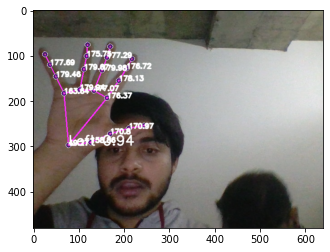

170.97
170.8
158.86
49.27
176.37
178.13
176.72
177.07
179.98
177.29
179.94
179.67
175.75
163.64
179.46
177.69
<class 'mediapipe.python.solution_base.SolutionOutputs'>


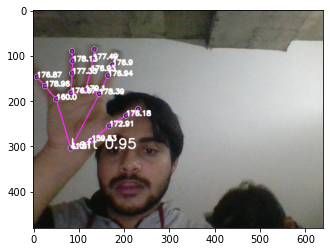

176.18
172.91
159.53
41.81
178.39
176.94
176.9
179.1
176.93
177.49
176.67
177.33
178.13
160.0
178.96
176.87
<class 'mediapipe.python.solution_base.SolutionOutputs'>


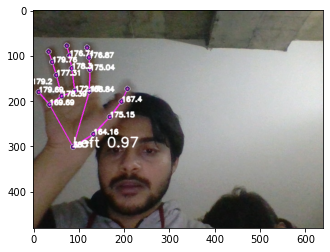

167.4
175.15
164.16
38.71
168.84
175.04
176.87
172.17
178.3
176.71
178.39
177.31
179.76
169.69
179.69
179.2
<class 'mediapipe.python.solution_base.SolutionOutputs'>


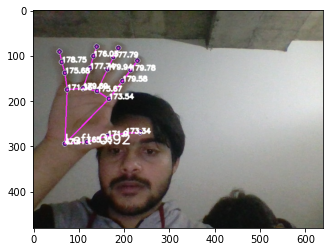

173.34
171.0
165.35
47.4
173.54
179.58
179.78
175.67
179.94
177.79
179.69
177.74
176.03
171.36
175.68
178.75
<class 'mediapipe.python.solution_base.SolutionOutputs'>


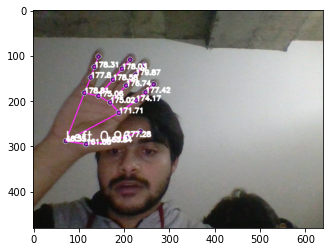

177.28
165.84
161.06
46.55
171.71
174.17
177.42
175.02
176.74
179.87
175.06
178.58
178.03
178.81
177.8
178.31
<class 'mediapipe.python.solution_base.SolutionOutputs'>


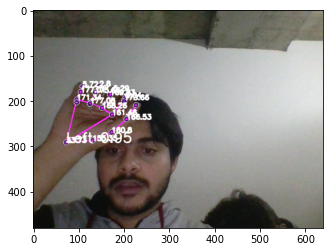

166.53
160.8
155.35
33.73
161.46
173.66
9.04
168.26
5.29
169.83
177.08
2.8
175.66
171.34
5.72
177.01
<class 'mediapipe.python.solution_base.SolutionOutputs'>


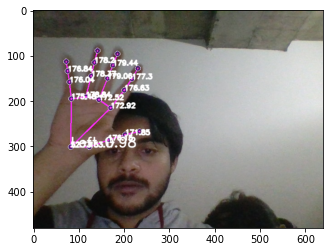

171.85
176.15
153.17
52.73
172.92
176.63
177.3
172.52
179.06
179.44
178.84
178.37
178.2
175.48
176.04
176.84
<class 'mediapipe.python.solution_base.SolutionOutputs'>


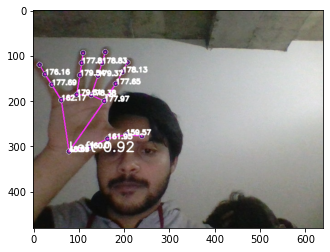

159.57
161.95
160.0
48.69
177.97
177.65
178.13
178.38
179.37
178.83
179.31
179.54
177.81
162.17
177.69
176.16
<class 'mediapipe.python.solution_base.SolutionOutputs'>


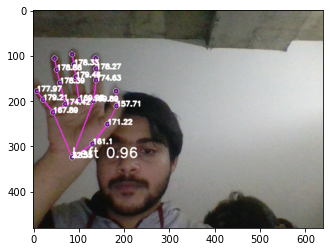

157.71
171.22
161.1
32.55
169.89
174.63
178.27
169.23
179.46
178.33
174.42
178.39
178.88
167.89
179.21
177.97
<class 'mediapipe.python.solution_base.SolutionOutputs'>


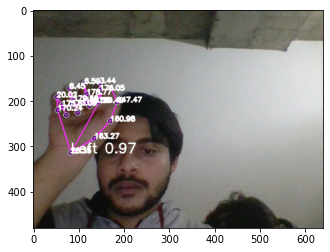

147.47
160.98
163.27
28.35
159.49
3.44
176.05
166.58
6.59
178.77
173.09
8.45
179.58
170.24
20.02
175.6
<class 'mediapipe.python.solution_base.SolutionOutputs'>


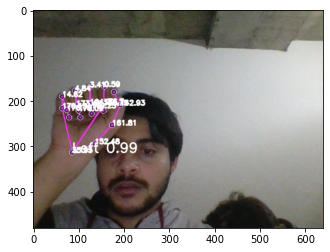

142.93
161.81
152.48
35.95
155.75
0.59
176.7
164.99
3.41
179.25
173.41
4.84
179.09
170.13
14.62
176.78
<class 'mediapipe.python.solution_base.SolutionOutputs'>


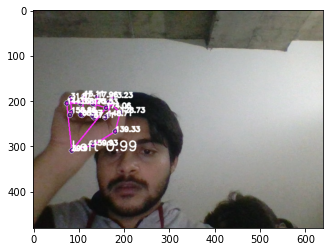

128.73
139.33
159.93
39.9
174.06
13.23
148.71
173.53
17.96
37.11
168.76
15.11
68.27
144.37
31.87
158.86
<class 'mediapipe.python.solution_base.SolutionOutputs'>


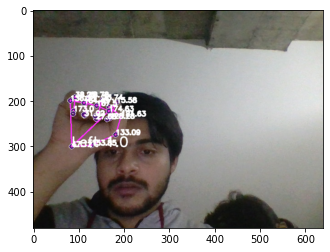

121.63
133.09
153.85
47.12
174.63
15.58
128.28
167.5
23.74
27.68
164.43
18.78
31.02
136.23
38.25
173.0
<class 'mediapipe.python.solution_base.SolutionOutputs'>


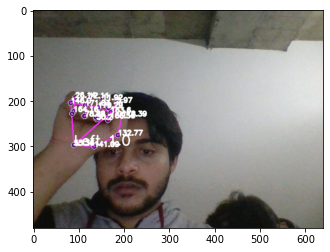

118.39
132.77
141.09
55.36
163.6
5.97
166.56
179.29
11.92
30.2
171.03
12.11
78.88
146.0
26.14
164.16
<class 'mediapipe.python.solution_base.SolutionOutputs'>


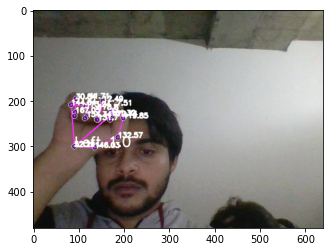

119.85
132.57
146.03
52.29
161.32
7.51
172.74
178.8
12.49
131.7
173.24
11.71
154.34
144.64
30.84
167.05
<class 'mediapipe.python.solution_base.SolutionOutputs'>


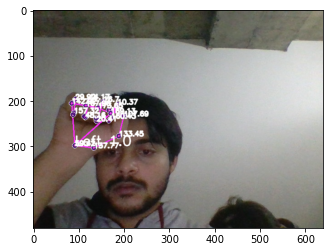

107.69
133.45
137.77
59.42
169.13
10.37
160.43
173.65
16.7
20.41
167.96
14.17
48.16
142.92
29.92
157.32
<class 'mediapipe.python.solution_base.SolutionOutputs'>


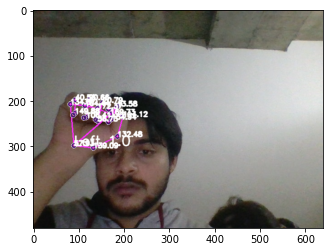

114.12
132.48
139.09
57.93
169.73
13.58
154.94
172.37
20.79
56.73
164.44
20.66
106.41
134.87
40.56
149.88
<class 'mediapipe.python.solution_base.SolutionOutputs'>


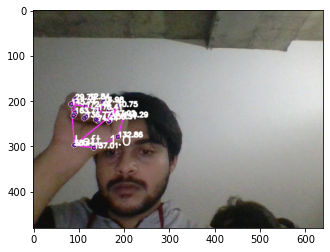

110.29
132.86
137.01
58.44
167.02
10.75
156.51
178.41
14.98
74.44
172.48
12.84
136.77
145.74
29.79
163.71
<class 'mediapipe.python.solution_base.SolutionOutputs'>


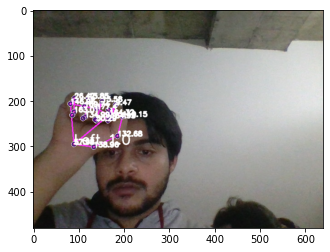

110.15
132.68
138.96
57.98
164.32
9.47
164.93
177.4
15.58
50.29
169.74
13.85
134.99
146.96
26.42
163.01
<class 'mediapipe.python.solution_base.SolutionOutputs'>


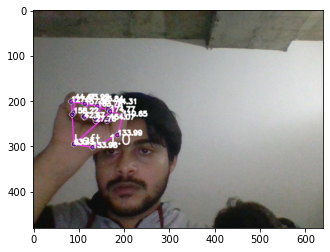

110.65
133.99
133.98
63.45
174.77
14.31
154.07
163.78
25.84
27.76
157.58
23.92
42.67
127.5
44.47
158.22
<class 'mediapipe.python.solution_base.SolutionOutputs'>


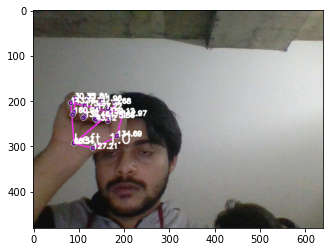

112.97
134.69
127.21
66.54
159.12
5.68
175.86
177.22
11.96
43.12
173.21
11.81
139.46
143.15
30.35
160.94
<class 'mediapipe.python.solution_base.SolutionOutputs'>


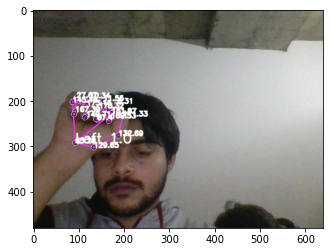

111.33
132.69
129.65
65.28
161.87
6.31
169.53
178.32
11.55
67.4
173.16
10.34
149.71
145.48
27.67
167.39
<class 'mediapipe.python.solution_base.SolutionOutputs'>


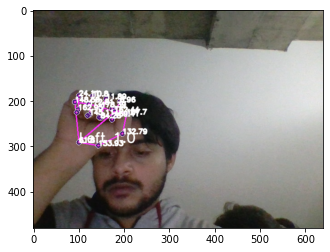

107.7
132.79
133.93
61.8
162.44
6.96
169.41
178.39
11.89
84.28
172.81
10.8
145.11
148.58
24.11
162.95


In [11]:
cap = cv2.VideoCapture(0)
angle_list=[]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
                
                # Render left or right detection
                if get_label(num, hand, results):
                    text, coord = get_label(num, hand, results)
                    cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Draw angles to image from joint list
            angle_list=draw_finger_angles(image, results, joint_list)

        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
        for angle in angle_list:
            print(angle)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


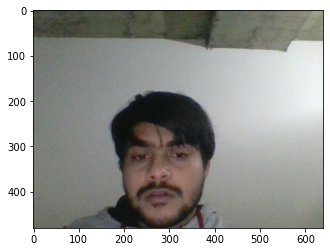

<class 'mediapipe.python.solution_base.SolutionOutputs'>


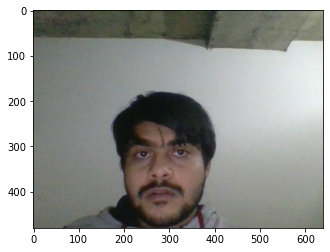

<class 'mediapipe.python.solution_base.SolutionOutputs'>


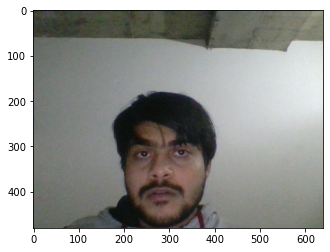

<class 'mediapipe.python.solution_base.SolutionOutputs'>


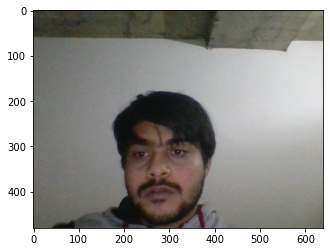

<class 'mediapipe.python.solution_base.SolutionOutputs'>


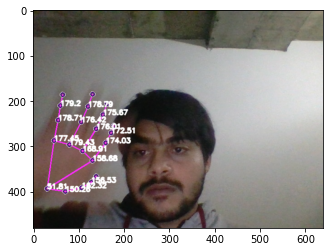

156.53
162.32
150.26
51.81
158.68
174.03
172.51
168.91
176.01
175.67
179.43
176.42
178.79
177.45
178.71
179.2
<class 'mediapipe.python.solution_base.SolutionOutputs'>


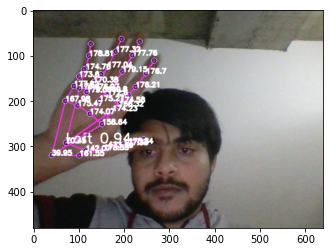

178.84
173.69
142.07
70.45
166.32
176.21
176.7
172.6
179.15
177.76
176.97
177.04
177.32
176.4
174.76
178.81
177.33
178.55
161.55
39.95
158.64
174.23
174.58
174.07
175.27
169.8
175.47
179.06
170.38
167.98
177.82
173.6
<class 'mediapipe.python.solution_base.SolutionOutputs'>


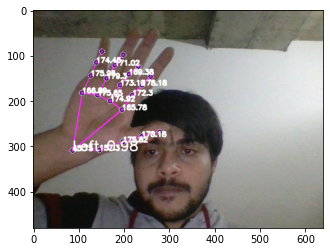

178.18
175.82
157.3
45.75
165.78
172.3
178.18
174.92
173.19
169.38
175.65
179.3
171.02
166.89
175.95
174.45
<class 'mediapipe.python.solution_base.SolutionOutputs'>


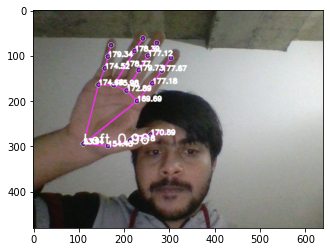

170.69
177.18
154.43
53.94
169.69
177.18
177.67
172.89
179.73
177.12
175.98
178.77
178.39
174.66
174.52
179.34
<class 'mediapipe.python.solution_base.SolutionOutputs'>


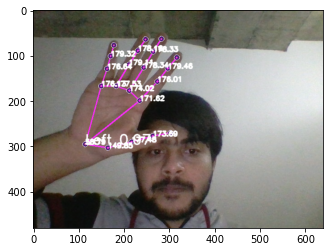

173.69
177.48
149.85
58.79
171.62
176.01
179.46
174.02
178.34
178.33
177.53
179.11
178.16
176.13
176.64
179.32
<class 'mediapipe.python.solution_base.SolutionOutputs'>


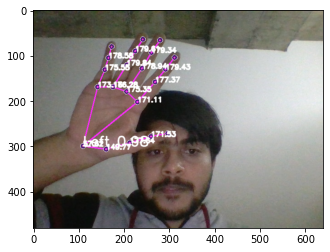

171.53
177.64
149.77
57.62
171.11
177.37
179.43
175.35
178.94
179.34
176.28
179.84
179.61
173.16
175.55
178.58
<class 'mediapipe.python.solution_base.SolutionOutputs'>


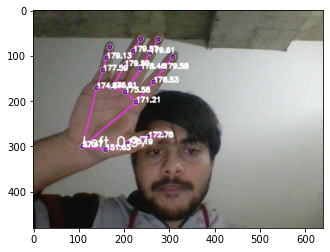

172.78
175.19
151.63
57.47
171.21
176.53
179.58
175.58
178.46
179.61
176.91
179.59
179.57
174.84
177.59
179.13
<class 'mediapipe.python.solution_base.SolutionOutputs'>


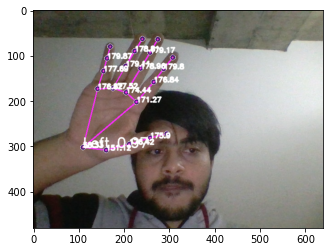

175.9
176.42
151.12
58.33
171.27
176.84
179.8
174.44
178.96
179.17
177.52
179.11
178.81
176.82
177.69
179.87
<class 'mediapipe.python.solution_base.SolutionOutputs'>


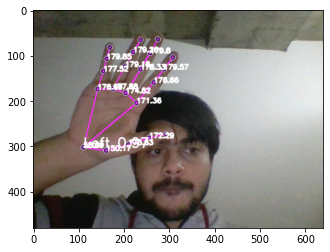

172.29
175.63
150.17
58.89
171.36
176.66
179.57
174.82
178.33
179.8
177.88
179.18
179.26
176.69
177.52
179.85
<class 'mediapipe.python.solution_base.SolutionOutputs'>


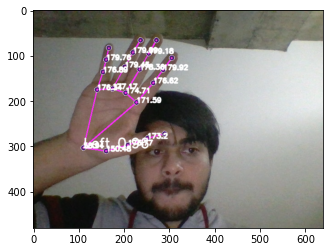

173.2
173.77
150.48
58.94
171.59
176.62
179.92
174.71
178.36
179.18
177.17
179.45
179.09
176.34
176.89
179.76
<class 'mediapipe.python.solution_base.SolutionOutputs'>


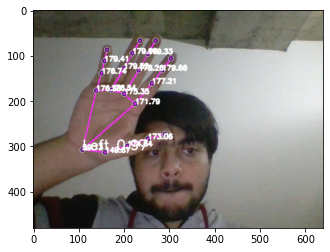

173.06
174.64
149.67
59.13
171.79
177.21
179.66
175.35
178.26
179.33
176.54
179.52
179.06
176.38
176.74
179.41
<class 'mediapipe.python.solution_base.SolutionOutputs'>


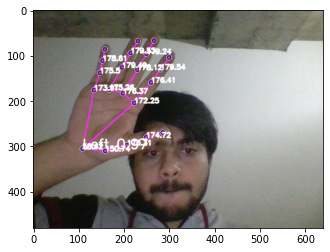

174.72
173.31
150.74
58.42
172.25
176.41
179.54
176.37
178.12
179.24
175.26
179.49
179.53
173.91
175.5
178.61
<class 'mediapipe.python.solution_base.SolutionOutputs'>


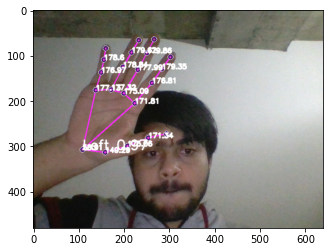

171.34
175.06
149.29
58.91
171.81
176.81
179.35
175.09
177.99
179.86
177.32
178.84
179.62
177.13
176.97
178.6
<class 'mediapipe.python.solution_base.SolutionOutputs'>


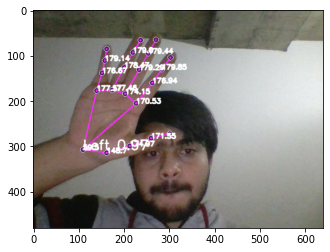

171.55
174.97
148.7
59.5
170.53
176.94
179.85
174.15
179.29
179.44
177.46
178.47
179.0
177.57
176.67
179.14
<class 'mediapipe.python.solution_base.SolutionOutputs'>


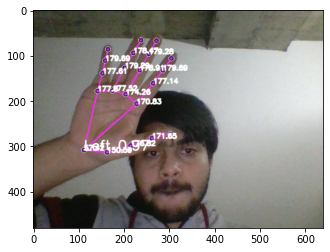

171.65
176.82
150.59
57.42
170.83
177.14
179.69
174.26
178.91
179.28
177.52
179.29
178.47
177.8
177.61
179.69
<class 'mediapipe.python.solution_base.SolutionOutputs'>


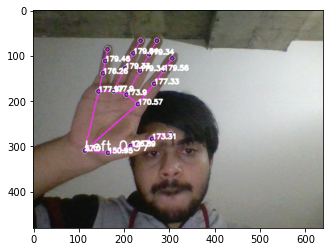

173.31
176.89
150.95
57.0
170.57
177.33
179.56
173.9
179.34
179.34
177.9
179.33
179.04
177.97
176.26
179.46
<class 'mediapipe.python.solution_base.SolutionOutputs'>


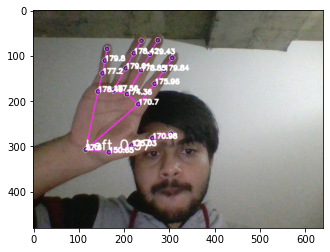

170.98
175.03
150.65
57.6
170.7
175.96
179.84
174.36
178.85
179.43
177.56
179.01
178.42
178.49
177.2
179.8
<class 'mediapipe.python.solution_base.SolutionOutputs'>


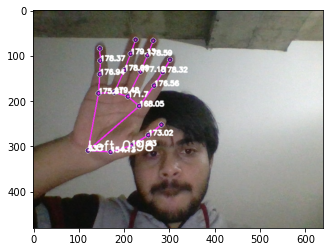

173.02
161.43
154.13
53.7
168.05
176.56
178.32
171.7
177.18
178.59
179.48
178.09
179.13
175.81
176.94
178.37
<class 'mediapipe.python.solution_base.SolutionOutputs'>


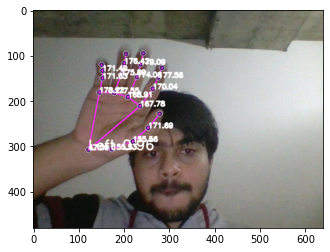

171.69
155.56
155.53
47.09
167.78
170.04
177.56
168.91
174.06
179.09
177.55
175.89
176.42
178.22
171.63
171.49
<class 'mediapipe.python.solution_base.SolutionOutputs'>


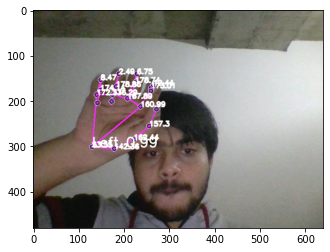

157.3
162.44
142.36
53.55
160.99
173.01
12.44
167.89
6.75
178.74
176.29
2.49
178.86
172.33
8.47
174.14
<class 'mediapipe.python.solution_base.SolutionOutputs'>


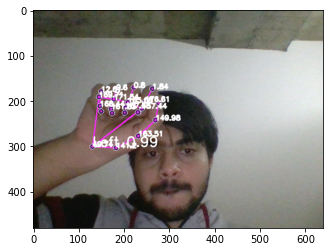

149.98
163.51
141.2
49.74
157.44
1.84
176.61
165.68
0.8
167.68
171.54
0.6
161.83
169.71
12.61
168.44
<class 'mediapipe.python.solution_base.SolutionOutputs'>


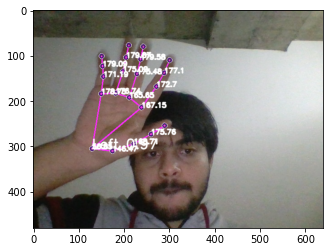

175.76
168.71
146.47
56.85
167.15
172.7
177.1
165.65
175.48
179.58
176.74
175.02
179.87
178.75
171.19
179.09
<class 'mediapipe.python.solution_base.SolutionOutputs'>


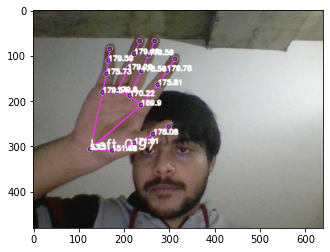

178.08
171.61
151.68
53.51
169.9
175.81
179.78
170.22
178.56
179.56
179.8
179.26
179.49
179.54
175.73
179.59
<class 'mediapipe.python.solution_base.SolutionOutputs'>


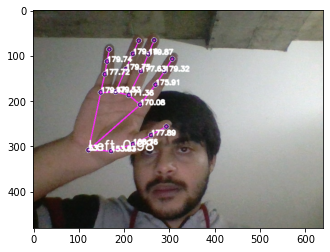

177.89
168.76
153.83
53.1
170.08
175.91
179.32
171.36
177.63
179.87
179.53
179.75
179.16
179.47
177.72
179.74
<class 'mediapipe.python.solution_base.SolutionOutputs'>


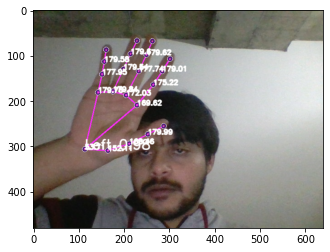

179.99
168.46
152.11
53.71
169.62
175.22
179.01
172.03
177.74
179.62
179.84
179.54
179.6
179.76
177.95
179.58
<class 'mediapipe.python.solution_base.SolutionOutputs'>


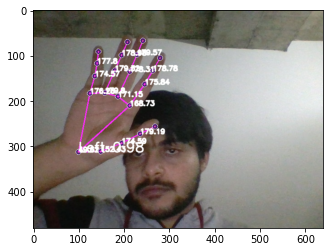

179.19
174.59
152.43
49.62
168.73
175.84
178.78
171.15
178.31
179.57
179.8
179.32
178.98
176.26
174.57
177.8
<class 'mediapipe.python.solution_base.SolutionOutputs'>


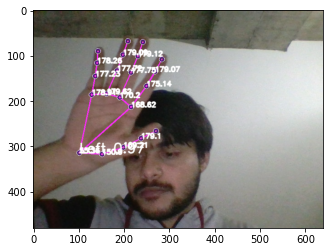

179.1
169.21
150.9
55.36
168.62
175.14
179.07
170.2
177.75
179.12
179.62
177.72
179.09
178.91
177.23
178.26
<class 'mediapipe.python.solution_base.SolutionOutputs'>


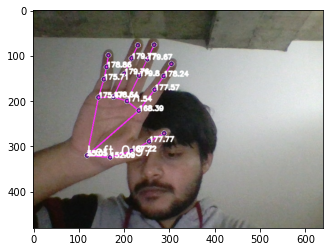

177.77
167.22
152.09
55.05
168.39
177.57
178.24
171.54
179.8
179.67
178.64
179.76
179.77
175.47
175.71
178.86


In [13]:
cap = cv2.VideoCapture(0)
angle_list=[]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
                
                # Render left or right detection
                if get_label(num, hand, results):
                    text, coord = get_label(num, hand, results)
                    cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Draw angles to image from joint list
            angle_list=draw_finger_angles(image, results, joint_list)

        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
        for angle in angle_list:
            print(angle)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [11]:
import csv

In [16]:
ctr=1
path=r"C:\Users\charc\project_files\train"
angle_list=[]
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    for r in os.listdir(path):
        img_fol=os.path.join(path,r)
        for p in os.listdir(img_fol):
            img_path=os.path.join(img_fol,p)
            img= Image.open(img_path)
            image = np.array(img)
                    # Flip on horizontal
            image = cv2.flip(image, 1)

            # Set flag
            image.flags.writeable = False

            # Detections
            results = hands.process(image)

            # Set flag to true
            image.flags.writeable = True

            # RGB 2 BGR
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Detections
            print(results)

            # Rendering results
            if results.multi_hand_landmarks:
                for num, hand in enumerate(results.multi_hand_landmarks):
                    mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                            mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                             )

                    # Render left or right detection
                    if get_label(num, hand, results):
                        text, coord = get_label(num, hand, results)
                        cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

                # Draw angles to image from joint list
                angle_list=draw_finger_angles(image, results, joint_list)

#             plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#             plt.show()
            angle_list.insert(0,r+"_"+p)
            angle_list.append(r)
            
#             for angle in angle_list:
#                 print(angle)
            # Save our image    
            name=r+p
            cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(r+"_"+p)), image)
#             cv2.imshow('Hand Tracking', image)
            with open('dataset', 'a') as f:
                write = csv.writer(f)
                write.writerow(angle_list)
            per=round((ctr/4972)*100,3)
            print(ctr," of 4972 files done ",per,"%")
            ctr=ctr+1
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()
            
            

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1  of 4972 files done  0.02 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2  of 4972 files done  0.04 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3  of 4972 files done  0.06 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4  of 4972 files done  0.08 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
5  of 4972 files done  0.101 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
6  of 4972 files done  0.121 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
7  of 4972 files done  0.141 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8  of 4972 files done  0.161 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
9  of 4972 files done  0.181 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
10  of 4972 files done  0.201 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
11  of 4972 files done  0.221 %
<class 'mediapipe.python.solution_

<class 'mediapipe.python.solution_base.SolutionOutputs'>
95  of 4972 files done  1.911 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
96  of 4972 files done  1.931 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
97  of 4972 files done  1.951 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
98  of 4972 files done  1.971 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
99  of 4972 files done  1.991 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100  of 4972 files done  2.011 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
101  of 4972 files done  2.031 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
102  of 4972 files done  2.051 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
103  of 4972 files done  2.072 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
104  of 4972 files done  2.092 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
105  of 4972 files done  2.112 %
<class 'mediapi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
187  of 4972 files done  3.761 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
188  of 4972 files done  3.781 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
189  of 4972 files done  3.801 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
190  of 4972 files done  3.821 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
191  of 4972 files done  3.842 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
192  of 4972 files done  3.862 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
193  of 4972 files done  3.882 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
194  of 4972 files done  3.902 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
195  of 4972 files done  3.922 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
196  of 4972 files done  3.942 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
197  of 4972 files done  3.962 %
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
281  of 4972 files done  5.652 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
282  of 4972 files done  5.672 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
283  of 4972 files done  5.692 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
284  of 4972 files done  5.712 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
285  of 4972 files done  5.732 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
286  of 4972 files done  5.752 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
287  of 4972 files done  5.772 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
288  of 4972 files done  5.792 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
289  of 4972 files done  5.813 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
290  of 4972 files done  5.833 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
291  of 4972 files done  5.853 %
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
374  of 4972 files done  7.522 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
375  of 4972 files done  7.542 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
376  of 4972 files done  7.562 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
377  of 4972 files done  7.582 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
378  of 4972 files done  7.603 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
379  of 4972 files done  7.623 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
380  of 4972 files done  7.643 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
381  of 4972 files done  7.663 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
382  of 4972 files done  7.683 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
383  of 4972 files done  7.703 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
384  of 4972 files done  7.723 %
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
466  of 4972 files done  9.372 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
467  of 4972 files done  9.393 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
468  of 4972 files done  9.413 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
469  of 4972 files done  9.433 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
470  of 4972 files done  9.453 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
471  of 4972 files done  9.473 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
472  of 4972 files done  9.493 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
473  of 4972 files done  9.513 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
474  of 4972 files done  9.533 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
475  of 4972 files done  9.553 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
476  of 4972 files done  9.574 %
<class 'me

556  of 4972 files done  11.183 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
557  of 4972 files done  11.203 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
558  of 4972 files done  11.223 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
559  of 4972 files done  11.243 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
560  of 4972 files done  11.263 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
561  of 4972 files done  11.283 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
562  of 4972 files done  11.303 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
563  of 4972 files done  11.323 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
564  of 4972 files done  11.344 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
565  of 4972 files done  11.364 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
566  of 4972 files done  11.384 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
649  of 4972 files done  13.053 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
650  of 4972 files done  13.073 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
651  of 4972 files done  13.093 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
652  of 4972 files done  13.113 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
653  of 4972 files done  13.134 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
654  of 4972 files done  13.154 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
655  of 4972 files done  13.174 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
656  of 4972 files done  13.194 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
657  of 4972 files done  13.214 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
658  of 4972 files done  13.234 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
659  of 4972 files done  13.254 %

<class 'mediapipe.python.solution_base.SolutionOutputs'>
741  of 4972 files done  14.903 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
742  of 4972 files done  14.924 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
743  of 4972 files done  14.944 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
744  of 4972 files done  14.964 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
745  of 4972 files done  14.984 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
746  of 4972 files done  15.004 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
747  of 4972 files done  15.024 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
748  of 4972 files done  15.044 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
749  of 4972 files done  15.064 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
750  of 4972 files done  15.084 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
751  of 4972 files done  15.105 %

<class 'mediapipe.python.solution_base.SolutionOutputs'>
832  of 4972 files done  16.734 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
833  of 4972 files done  16.754 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
834  of 4972 files done  16.774 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
835  of 4972 files done  16.794 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
836  of 4972 files done  16.814 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
837  of 4972 files done  16.834 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
838  of 4972 files done  16.854 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
839  of 4972 files done  16.874 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
840  of 4972 files done  16.895 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
841  of 4972 files done  16.915 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
842  of 4972 files done  16.935 %

<class 'mediapipe.python.solution_base.SolutionOutputs'>
923  of 4972 files done  18.564 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
924  of 4972 files done  18.584 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
925  of 4972 files done  18.604 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
926  of 4972 files done  18.624 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
927  of 4972 files done  18.644 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
928  of 4972 files done  18.665 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
929  of 4972 files done  18.685 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
930  of 4972 files done  18.705 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
931  of 4972 files done  18.725 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
932  of 4972 files done  18.745 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
933  of 4972 files done  18.765 %

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1014  of 4972 files done  20.394 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1015  of 4972 files done  20.414 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1016  of 4972 files done  20.434 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1017  of 4972 files done  20.455 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1018  of 4972 files done  20.475 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1019  of 4972 files done  20.495 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1020  of 4972 files done  20.515 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1021  of 4972 files done  20.535 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1022  of 4972 files done  20.555 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1023  of 4972 files done  20.575 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1024  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1105  of 4972 files done  22.224 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1106  of 4972 files done  22.245 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1107  of 4972 files done  22.265 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1108  of 4972 files done  22.285 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1109  of 4972 files done  22.305 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1110  of 4972 files done  22.325 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1111  of 4972 files done  22.345 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1112  of 4972 files done  22.365 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1113  of 4972 files done  22.385 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1114  of 4972 files done  22.405 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1115  of 4972 files don

1194  of 4972 files done  24.014 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1195  of 4972 files done  24.035 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1196  of 4972 files done  24.055 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1197  of 4972 files done  24.075 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1198  of 4972 files done  24.095 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1199  of 4972 files done  24.115 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1200  of 4972 files done  24.135 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1201  of 4972 files done  24.155 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1202  of 4972 files done  24.175 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1203  of 4972 files done  24.195 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1204  of 4972 files done  24.216 %
<class 'mediapipe.python.solution_base.Soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1285  of 4972 files done  25.845 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1286  of 4972 files done  25.865 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1287  of 4972 files done  25.885 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1288  of 4972 files done  25.905 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1289  of 4972 files done  25.925 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1290  of 4972 files done  25.945 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1291  of 4972 files done  25.965 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1292  of 4972 files done  25.986 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1293  of 4972 files done  26.006 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1294  of 4972 files done  26.026 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1295  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1376  of 4972 files done  27.675 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1377  of 4972 files done  27.695 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1378  of 4972 files done  27.715 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1379  of 4972 files done  27.735 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1380  of 4972 files done  27.755 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1381  of 4972 files done  27.776 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1382  of 4972 files done  27.796 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1383  of 4972 files done  27.816 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1384  of 4972 files done  27.836 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1385  of 4972 files done  27.856 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1386  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1468  of 4972 files done  29.525 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1469  of 4972 files done  29.545 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1470  of 4972 files done  29.566 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1471  of 4972 files done  29.586 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1472  of 4972 files done  29.606 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1473  of 4972 files done  29.626 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1474  of 4972 files done  29.646 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1475  of 4972 files done  29.666 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1476  of 4972 files done  29.686 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1477  of 4972 files done  29.706 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1478  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1558  of 4972 files done  31.335 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1559  of 4972 files done  31.356 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1560  of 4972 files done  31.376 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1561  of 4972 files done  31.396 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1562  of 4972 files done  31.416 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1563  of 4972 files done  31.436 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1564  of 4972 files done  31.456 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1565  of 4972 files done  31.476 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1566  of 4972 files done  31.496 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1567  of 4972 files done  31.516 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1568  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1649  of 4972 files done  33.166 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1650  of 4972 files done  33.186 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1651  of 4972 files done  33.206 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1652  of 4972 files done  33.226 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1653  of 4972 files done  33.246 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1654  of 4972 files done  33.266 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1655  of 4972 files done  33.286 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1656  of 4972 files done  33.307 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1657  of 4972 files done  33.327 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1658  of 4972 files done  33.347 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1659  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1739  of 4972 files done  34.976 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1740  of 4972 files done  34.996 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1741  of 4972 files done  35.016 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1742  of 4972 files done  35.036 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1743  of 4972 files done  35.056 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1744  of 4972 files done  35.076 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1745  of 4972 files done  35.097 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1746  of 4972 files done  35.117 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1747  of 4972 files done  35.137 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1748  of 4972 files done  35.157 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1749  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1829  of 4972 files done  36.786 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1830  of 4972 files done  36.806 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1831  of 4972 files done  36.826 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1832  of 4972 files done  36.846 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1833  of 4972 files done  36.866 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1834  of 4972 files done  36.887 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1835  of 4972 files done  36.907 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1836  of 4972 files done  36.927 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1837  of 4972 files done  36.947 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1838  of 4972 files done  36.967 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1839  of 4972 files don

1920  of 4972 files done  38.616 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1921  of 4972 files done  38.636 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1922  of 4972 files done  38.656 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1923  of 4972 files done  38.677 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1924  of 4972 files done  38.697 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1925  of 4972 files done  38.717 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1926  of 4972 files done  38.737 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1927  of 4972 files done  38.757 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1928  of 4972 files done  38.777 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1929  of 4972 files done  38.797 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1930  of 4972 files done  38.817 %
<class 'mediapipe.python.solution_base.Soluti

2011  of 4972 files done  40.447 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2012  of 4972 files done  40.467 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2013  of 4972 files done  40.487 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2014  of 4972 files done  40.507 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2015  of 4972 files done  40.527 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2016  of 4972 files done  40.547 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2017  of 4972 files done  40.567 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2018  of 4972 files done  40.587 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2019  of 4972 files done  40.607 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2020  of 4972 files done  40.628 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2021  of 4972 files done  40.648 %
<class 'mediapipe.python.solution_base.Soluti

2102  of 4972 files done  42.277 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2103  of 4972 files done  42.297 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2104  of 4972 files done  42.317 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2105  of 4972 files done  42.337 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2106  of 4972 files done  42.357 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2107  of 4972 files done  42.377 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2108  of 4972 files done  42.397 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2109  of 4972 files done  42.418 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2110  of 4972 files done  42.438 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2111  of 4972 files done  42.458 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2112  of 4972 files done  42.478 %
<class 'mediapipe.python.solution_base.Soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
2192  of 4972 files done  44.087 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2193  of 4972 files done  44.107 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2194  of 4972 files done  44.127 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2195  of 4972 files done  44.147 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2196  of 4972 files done  44.167 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2197  of 4972 files done  44.187 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2198  of 4972 files done  44.208 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2199  of 4972 files done  44.228 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2200  of 4972 files done  44.248 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2201  of 4972 files done  44.268 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2202  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
2283  of 4972 files done  45.917 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2284  of 4972 files done  45.937 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2285  of 4972 files done  45.957 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2286  of 4972 files done  45.977 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2287  of 4972 files done  45.998 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2288  of 4972 files done  46.018 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2289  of 4972 files done  46.038 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2290  of 4972 files done  46.058 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2291  of 4972 files done  46.078 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2292  of 4972 files done  46.098 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2293  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
2373  of 4972 files done  47.727 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2374  of 4972 files done  47.747 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2375  of 4972 files done  47.767 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2376  of 4972 files done  47.788 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2377  of 4972 files done  47.808 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2378  of 4972 files done  47.828 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2379  of 4972 files done  47.848 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2380  of 4972 files done  47.868 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2381  of 4972 files done  47.888 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2382  of 4972 files done  47.908 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2383  of 4972 files don

2462  of 4972 files done  49.517 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2463  of 4972 files done  49.537 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2464  of 4972 files done  49.558 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2465  of 4972 files done  49.578 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2466  of 4972 files done  49.598 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2467  of 4972 files done  49.618 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2468  of 4972 files done  49.638 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2469  of 4972 files done  49.658 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2470  of 4972 files done  49.678 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2471  of 4972 files done  49.698 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2472  of 4972 files done  49.718 %
<class 'mediapipe.python.solution_base.Soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
2552  of 4972 files done  51.327 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2553  of 4972 files done  51.348 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2554  of 4972 files done  51.368 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2555  of 4972 files done  51.388 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2556  of 4972 files done  51.408 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2557  of 4972 files done  51.428 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2558  of 4972 files done  51.448 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2559  of 4972 files done  51.468 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2560  of 4972 files done  51.488 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2561  of 4972 files done  51.508 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2562  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
2643  of 4972 files done  53.158 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2644  of 4972 files done  53.178 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2645  of 4972 files done  53.198 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2646  of 4972 files done  53.218 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2647  of 4972 files done  53.238 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2648  of 4972 files done  53.258 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2649  of 4972 files done  53.278 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2650  of 4972 files done  53.298 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2651  of 4972 files done  53.319 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2652  of 4972 files done  53.339 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2653  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
2733  of 4972 files done  54.968 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2734  of 4972 files done  54.988 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2735  of 4972 files done  55.008 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2736  of 4972 files done  55.028 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2737  of 4972 files done  55.048 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2738  of 4972 files done  55.068 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2739  of 4972 files done  55.088 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2740  of 4972 files done  55.109 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2741  of 4972 files done  55.129 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2742  of 4972 files done  55.149 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2743  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
2823  of 4972 files done  56.778 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2824  of 4972 files done  56.798 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2825  of 4972 files done  56.818 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2826  of 4972 files done  56.838 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2827  of 4972 files done  56.858 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2828  of 4972 files done  56.879 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2829  of 4972 files done  56.899 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2830  of 4972 files done  56.919 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2831  of 4972 files done  56.939 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2832  of 4972 files done  56.959 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2833  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
2915  of 4972 files done  58.628 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2916  of 4972 files done  58.648 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2917  of 4972 files done  58.669 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2918  of 4972 files done  58.689 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2919  of 4972 files done  58.709 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2920  of 4972 files done  58.729 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2921  of 4972 files done  58.749 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2922  of 4972 files done  58.769 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2923  of 4972 files done  58.789 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2924  of 4972 files done  58.809 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
2925  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
3006  of 4972 files done  60.459 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3007  of 4972 files done  60.479 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3008  of 4972 files done  60.499 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3009  of 4972 files done  60.519 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3010  of 4972 files done  60.539 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3011  of 4972 files done  60.559 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3012  of 4972 files done  60.579 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3013  of 4972 files done  60.599 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3014  of 4972 files done  60.619 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3015  of 4972 files done  60.64 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3016  of 4972 files done

<class 'mediapipe.python.solution_base.SolutionOutputs'>
3096  of 4972 files done  62.269 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3097  of 4972 files done  62.289 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3098  of 4972 files done  62.309 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3099  of 4972 files done  62.329 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3100  of 4972 files done  62.349 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3101  of 4972 files done  62.369 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3102  of 4972 files done  62.389 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3103  of 4972 files done  62.409 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3104  of 4972 files done  62.43 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3105  of 4972 files done  62.45 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3106  of 4972 files done 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
3187  of 4972 files done  64.099 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3188  of 4972 files done  64.119 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3189  of 4972 files done  64.139 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3190  of 4972 files done  64.159 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3191  of 4972 files done  64.179 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3192  of 4972 files done  64.2 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3193  of 4972 files done  64.22 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3194  of 4972 files done  64.24 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3195  of 4972 files done  64.26 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3196  of 4972 files done  64.28 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3197  of 4972 files done  64.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
3278  of 4972 files done  65.929 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3279  of 4972 files done  65.949 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3280  of 4972 files done  65.969 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3281  of 4972 files done  65.99 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3282  of 4972 files done  66.01 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3283  of 4972 files done  66.03 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3284  of 4972 files done  66.05 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3285  of 4972 files done  66.07 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3286  of 4972 files done  66.09 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3287  of 4972 files done  66.11 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3288  of 4972 files done  66.1

<class 'mediapipe.python.solution_base.SolutionOutputs'>
3368  of 4972 files done  67.739 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3369  of 4972 files done  67.759 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3370  of 4972 files done  67.78 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3371  of 4972 files done  67.8 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3372  of 4972 files done  67.82 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3373  of 4972 files done  67.84 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3374  of 4972 files done  67.86 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3375  of 4972 files done  67.88 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3376  of 4972 files done  67.9 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3377  of 4972 files done  67.92 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3378  of 4972 files done  67.94 %

3457  of 4972 files done  69.529 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3458  of 4972 files done  69.549 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3459  of 4972 files done  69.57 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3460  of 4972 files done  69.59 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3461  of 4972 files done  69.61 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3462  of 4972 files done  69.63 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3463  of 4972 files done  69.65 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3464  of 4972 files done  69.67 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3465  of 4972 files done  69.69 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3466  of 4972 files done  69.71 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3467  of 4972 files done  69.73 %
<class 'mediapipe.python.solution_base.SolutionOutputs

<class 'mediapipe.python.solution_base.SolutionOutputs'>
3548  of 4972 files done  71.36 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3549  of 4972 files done  71.38 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3550  of 4972 files done  71.4 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3551  of 4972 files done  71.42 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3552  of 4972 files done  71.44 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3553  of 4972 files done  71.46 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3554  of 4972 files done  71.48 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3555  of 4972 files done  71.5 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3556  of 4972 files done  71.521 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3557  of 4972 files done  71.541 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3558  of 4972 files done  71.561 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
3638  of 4972 files done  73.17 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3639  of 4972 files done  73.19 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3640  of 4972 files done  73.21 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3641  of 4972 files done  73.23 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3642  of 4972 files done  73.25 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3643  of 4972 files done  73.27 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3644  of 4972 files done  73.29 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3645  of 4972 files done  73.311 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3646  of 4972 files done  73.331 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3647  of 4972 files done  73.351 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3648  of 4972 files done  73.3

<class 'mediapipe.python.solution_base.SolutionOutputs'>
3729  of 4972 files done  75.0 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3730  of 4972 files done  75.02 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3731  of 4972 files done  75.04 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3732  of 4972 files done  75.06 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3733  of 4972 files done  75.08 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3734  of 4972 files done  75.101 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3735  of 4972 files done  75.121 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3736  of 4972 files done  75.141 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3737  of 4972 files done  75.161 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3738  of 4972 files done  75.181 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3739  of 4972 files done  75.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
3819  of 4972 files done  76.81 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3820  of 4972 files done  76.83 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3821  of 4972 files done  76.85 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3822  of 4972 files done  76.87 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3823  of 4972 files done  76.891 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3824  of 4972 files done  76.911 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3825  of 4972 files done  76.931 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3826  of 4972 files done  76.951 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3827  of 4972 files done  76.971 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3828  of 4972 files done  76.991 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3829  of 4972 files done  7

<class 'mediapipe.python.solution_base.SolutionOutputs'>
3911  of 4972 files done  78.66 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3912  of 4972 files done  78.681 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3913  of 4972 files done  78.701 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3914  of 4972 files done  78.721 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3915  of 4972 files done  78.741 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3916  of 4972 files done  78.761 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3917  of 4972 files done  78.781 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3918  of 4972 files done  78.801 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3919  of 4972 files done  78.821 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3920  of 4972 files done  78.842 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
3921  of 4972 files done

<class 'mediapipe.python.solution_base.SolutionOutputs'>
4001  of 4972 files done  80.471 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4002  of 4972 files done  80.491 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4003  of 4972 files done  80.511 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4004  of 4972 files done  80.531 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4005  of 4972 files done  80.551 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4006  of 4972 files done  80.571 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4007  of 4972 files done  80.591 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4008  of 4972 files done  80.611 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4009  of 4972 files done  80.632 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4010  of 4972 files done  80.652 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4011  of 4972 files don

4091  of 4972 files done  82.281 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4092  of 4972 files done  82.301 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4093  of 4972 files done  82.321 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4094  of 4972 files done  82.341 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4095  of 4972 files done  82.361 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4096  of 4972 files done  82.381 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4097  of 4972 files done  82.401 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4098  of 4972 files done  82.422 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4099  of 4972 files done  82.442 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4100  of 4972 files done  82.462 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4101  of 4972 files done  82.482 %
<class 'mediapipe.python.solution_base.Soluti

4181  of 4972 files done  84.091 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4182  of 4972 files done  84.111 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4183  of 4972 files done  84.131 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4184  of 4972 files done  84.151 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4185  of 4972 files done  84.171 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4186  of 4972 files done  84.191 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4187  of 4972 files done  84.212 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4188  of 4972 files done  84.232 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4189  of 4972 files done  84.252 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4190  of 4972 files done  84.272 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4191  of 4972 files done  84.292 %
<class 'mediapipe.python.solution_base.Soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
4272  of 4972 files done  85.921 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4273  of 4972 files done  85.941 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4274  of 4972 files done  85.961 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4275  of 4972 files done  85.981 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4276  of 4972 files done  86.002 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4277  of 4972 files done  86.022 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4278  of 4972 files done  86.042 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4279  of 4972 files done  86.062 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4280  of 4972 files done  86.082 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4281  of 4972 files done  86.102 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4282  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
4362  of 4972 files done  87.731 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4363  of 4972 files done  87.751 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4364  of 4972 files done  87.772 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4365  of 4972 files done  87.792 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4366  of 4972 files done  87.812 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4367  of 4972 files done  87.832 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4368  of 4972 files done  87.852 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4369  of 4972 files done  87.872 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4370  of 4972 files done  87.892 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4371  of 4972 files done  87.912 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4372  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
4452  of 4972 files done  89.541 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4453  of 4972 files done  89.562 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4454  of 4972 files done  89.582 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4455  of 4972 files done  89.602 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4456  of 4972 files done  89.622 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4457  of 4972 files done  89.642 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4458  of 4972 files done  89.662 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4459  of 4972 files done  89.682 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4460  of 4972 files done  89.702 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4461  of 4972 files done  89.722 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4462  of 4972 files don

<class 'mediapipe.python.solution_base.SolutionOutputs'>
4542  of 4972 files done  91.352 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4543  of 4972 files done  91.372 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4544  of 4972 files done  91.392 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4545  of 4972 files done  91.412 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4546  of 4972 files done  91.432 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4547  of 4972 files done  91.452 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4548  of 4972 files done  91.472 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4549  of 4972 files done  91.492 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4550  of 4972 files done  91.512 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4551  of 4972 files done  91.533 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4552  of 4972 files don

4632  of 4972 files done  93.162 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4633  of 4972 files done  93.182 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4634  of 4972 files done  93.202 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4635  of 4972 files done  93.222 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4636  of 4972 files done  93.242 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4637  of 4972 files done  93.262 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4638  of 4972 files done  93.282 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4639  of 4972 files done  93.302 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4640  of 4972 files done  93.323 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4641  of 4972 files done  93.343 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4642  of 4972 files done  93.363 %
<class 'mediapipe.python.solution_base.Soluti

4723  of 4972 files done  94.992 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4724  of 4972 files done  95.012 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4725  of 4972 files done  95.032 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4726  of 4972 files done  95.052 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4727  of 4972 files done  95.072 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4728  of 4972 files done  95.093 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4729  of 4972 files done  95.113 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4730  of 4972 files done  95.133 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4731  of 4972 files done  95.153 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4732  of 4972 files done  95.173 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4733  of 4972 files done  95.193 %
<class 'mediapipe.python.solution_base.Soluti

4814  of 4972 files done  96.822 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4815  of 4972 files done  96.842 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4816  of 4972 files done  96.862 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4817  of 4972 files done  96.883 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4818  of 4972 files done  96.903 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4819  of 4972 files done  96.923 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4820  of 4972 files done  96.943 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4821  of 4972 files done  96.963 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4822  of 4972 files done  96.983 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4823  of 4972 files done  97.003 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4824  of 4972 files done  97.023 %
<class 'mediapipe.python.solution_base.Soluti

4905  of 4972 files done  98.652 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4906  of 4972 files done  98.673 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4907  of 4972 files done  98.693 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4908  of 4972 files done  98.713 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4909  of 4972 files done  98.733 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4910  of 4972 files done  98.753 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4911  of 4972 files done  98.773 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4912  of 4972 files done  98.793 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4913  of 4972 files done  98.813 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4914  of 4972 files done  98.833 %
<class 'mediapipe.python.solution_base.SolutionOutputs'>
4915  of 4972 files done  98.854 %
<class 'mediapipe.python.solution_base.Soluti

NameError: name 'cap' is not defined